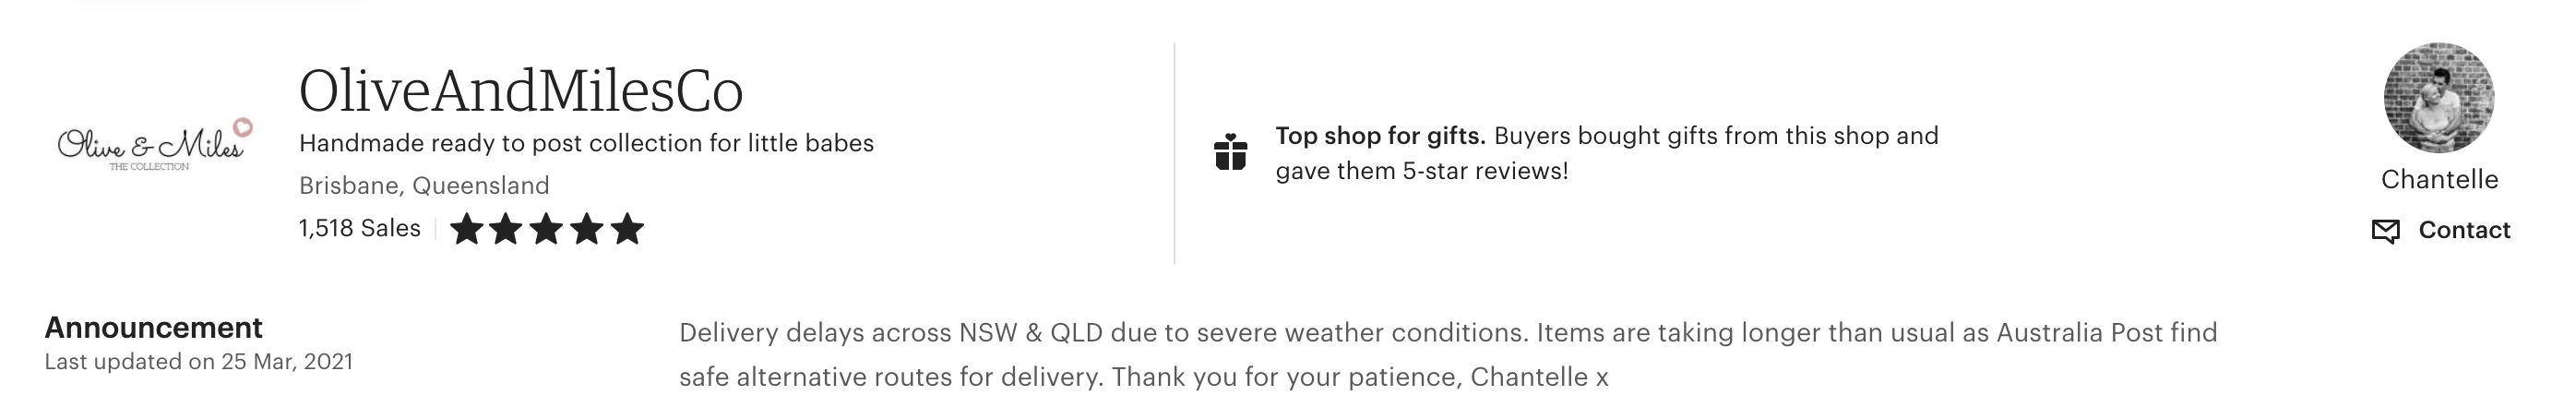

## Sales Analysis using Python and Jupyter Lab

1. I was tasked by my wife to analyse the data generated by her Etsy store
2. Via Etsy you area able to generate monthly sales extracts in a CSV format
3. The task was to analyse the data and dispel or confirm assumptions of sales trends and popular items

Link to Etsy store - https://www.etsy.com/au/shop/OliveAndMilesCo


### Setting up the environment
1. Import python libraries required to conduct analysis

In [2]:
import pandas as pd
import datetime
import numpy as np

### Import Monthly Sales Data
1. Each month is generated in a new CSV file
2. The standard read_csv method to load data using Pandas would require 24 dataframes
3. Using a for loop we are able to load files for each year programmatically
4. Convert the sales date to date time format, replace ' ' with '_'
5. Create new columns for sales month and a discount flag

In [3]:
file_name = '..//Data//EtsySoldOrderItems2019-{}.csv'
df1 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(3, 13)])
df1.columns = df1.columns.str.replace(' ','_').str.lower()
df1['sale_date'] = pd.to_datetime(df1['sale_date'])
df1['sale_month'] = df1['sale_date'].dt.date
df1['sale_month'] = df1['sale_month'] + pd.offsets.MonthEnd(0) 
df1['discount_used'] = np.where(df1['discount_amount']== 0, 0,1)

In [4]:
file_name = '..//Data//EtsySoldOrderItems2020-{}.csv'
df2 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1, 13)])
df2.columns = df2.columns.str.replace(' ','_').str.lower()
df2['sale_date'] = pd.to_datetime(df2['sale_date'])
df2['sale_month'] = df2['sale_date'].dt.date
df2['sale_month'] = df2['sale_month'] + pd.offsets.MonthEnd(0) 
df2['discount_used'] = np.where(df2['discount_amount']== 0, 0,1)

In [5]:
file_name = '..//Data//EtsySoldOrderItems2021-{}.csv'
df3 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1, 4)])
df3.columns = df3.columns.str.replace(' ','_').str.lower()
df3['sale_date'] = pd.to_datetime(df3['sale_date'])
df3['sale_month'] = df3['sale_date'].dt.date
df3['sale_month'] = df3['sale_month'] + pd.offsets.MonthEnd(0) 
df3['discount_used'] = np.where(df3['discount_amount']== 0, 0,1)

In [28]:
raw_data = pd.concat([df1,df2,df3])

In [29]:
raw_data.shape

(1477, 35)

In [30]:
raw_data.dtypes

sale_date            datetime64[ns]
item_name                    object
buyer                        object
quantity                     object
price                       float64
coupon_code                  object
coupon_details               object
discount_amount             float64
delivery_discount           float64
order_delivery               object
order_sales_tax             float64
item_total                   object
currency                     object
transaction_id               object
listing_id                   object
date_paid                    object
date_posted                  object
delivery_name                object
delivery_address1            object
delivery_address2            object
delivery_city                object
delivery_state               object
delivery_zipcode             object
delivery_country             object
order_id                     object
variations                   object
order_type                   object
listings_type               

In [31]:
raw_data.drop(columns=['delivery_address1', 'delivery_address2','delivery_city'
                        ,'delivery_state','delivery_zipcode','sku','vat_paid_by_buyer'
                        ,'inperson_discount','inperson_location','order_type'
                        ,'listings_type','payment_type'],inplace=True)

In [73]:
raw_data.head()

,sale_date,item_name,buyer,quantity,price,coupon_code,coupon_details,discount_amount,delivery_discount,order_delivery,...,listing_id,date_paid,date_posted,delivery_name,delivery_country,order_id,variations,sale_month,discount_used,item_group
0,2019-04-23,"baby boy girl overalls, unisex romper, kids ro...",NaN,1,48.0,NaN,NaN,0.0,0.0,0,...,683752646,04/24/2019,04/25/2019,Polly Campbell,Australia,1443228558,Kids' clothing size:1 AU kids&#039;,2019-04-30,0,Clothing
0,2019-05-31,"60's vintage retro dress, long sleeve ruffle n...",Pamela Wong (wong819),1,38.0,VIP10,VIP10 - % off,3.8,0.0,0,...,696011650,05/31/2019,06/02/2019,Pamela Wong,Australia,1467578723,Kids' clothing size:5 AU kids&#039;,2019-05-31,1,Non Grouped
1,2019-05-30,"Girls vintage retro collar, floral peter pan c...",Pamela Wong (wong819),1,18.0,NaN,NaN,0.0,0.0,0,...,701405955,05/30/2019,05/30/2019,Pamela Wong,Australia,1467169553,Kids' clothing size:Style &quot;B&quot; (mediu...,2019-05-31,0,Bib
2,2019-05-25,"Henry's denim dungarees, girl boy denim overal...",Stephanie (stephmerc1),1,38.0,NaN,NaN,0.0,0.0,0,...,704356547,05/25/2019,05/26/2019,Stephanie Philippou,Australia,1456286284,Kids' clothing size:2 AU kids&#039;,2019-05-31,0,Clothing
3,2019-05-22,"Veronica's velvet dungarees, pink velvet overa...",Katie Keast (katiejkeast),1,34.0,NaN,NaN,0.0,0.0,0,...,704370809,05/22/2019,05/23/2019,Katie Keast,Australia,1455455510,Kids' clothing size:0-3M AU kids&#039;,2019-05-31,0,Clothing


In [70]:
raw_data.item_name.tail(20)

56    Doll Nappy -21cm/ 38cm Doll, Dolly Diaper, Dol...
57    Dolls Bedding - Peony daisy bed cot quilt, Kma...
58                            Velvet Toddler Pillowcase
59    Dusty pink velvet cot quilt, baby girl blanket...
60    Velvet Dusty Pink play mat / rug, baby girl pl...
61    Wash Cloth organic bamboo cotton, baby wash ba...
62    Wash Cloth organic bamboo cotton, baby wash ba...
63    Wash Cloth organic bamboo cotton, baby wash ba...
64    Wash Cloth organic bamboo cotton, baby wash ba...
65    Baby girl pink floral bib, reversible vintage ...
66    Wildflower playmat/rug - FREE POSTAGE, baby pl...
67    Baby nursery basket Sage green tee shirt yarn,...
68    Wash Cloth organic bamboo cotton, baby wash ba...
69    Wash Cloth organic bamboo cotton, baby wash ba...
70    Wash Cloth organic bamboo cotton, floral baby ...
71    Wash Cloth organic bamboo cotton, floral baby ...
72    Wash Cloth organic bamboo cotton, baby wash ba...
73    Wash Cloth organic bamboo cotton, floral b

## Data manipulation and categorisation
1. Grouping items by a new item group columm
2. The item name in each order is a string and is hard to report on
3. By using the following steps we can create a new grouping for items

### Item categorisation
1. Create strings to search against
2. Add new item group column and apply the function below

In [34]:
wash_cloth = 'Wash Cloth'
wash_cloth_1 = 'Washer'
wash_cloth_2 = 'flannels'
hair_clip = 'Hair Clip'
hair_clip_1 = 'hair clips'
hair_clip_2 = 'hair clip'
hair_ties = 'Hair Ties'
bib = 'Bib'
bib_1 = 'bib'
burp_cloth = 'Burp Cloth'
doll_bedding = 'Doll Bedding'
doll_bedding_1 = 'Dolls Bedding'
play_mat = 'Play Mat'
play_mat_1 = 'play mat'
play_mat_2 = 'playmat'
doll_nappy = 'Doll Nappy'
bow_holder = 'Bow holder'
basket = 'basket'
clothing = 'romper'

In [35]:
def item_group(item_name):
    if wash_cloth in item_name or wash_cloth_1 in item_name or wash_cloth_2 in item_name: 
        return 'Wash Cloth'
    elif hair_clip in item_name or hair_clip_1 in item_name or hair_clip_2 in item_name:
        return 'Hair Clip'
    elif bib in item_name or bib_1 in item_name:
        return 'Bib'
    elif doll_bedding in item_name or doll_bedding_1 in item_name:
        return 'Doll Bedding'
    elif play_mat in item_name or play_mat_1 in item_name or play_mat_2 in item_name:
        return 'Play Mat'
    elif doll_nappy in item_name:
        return 'Doll Nappy'
    elif hair_ties in item_name:
        return 'Hair Tie'
    elif basket in item_name:
        return 'Basket'
    elif burp_cloth in item_name:
        return 'Burp Cloth'
    elif clothing in item_name:
        return 'Clothing'
    else:
        return 'Non Grouped'

In [36]:
raw_data['item_group'] = raw_data['item_name'].apply(item_group)

In [37]:
raw_data['price'] = raw_data['price'].astype(float)

## Initial Data Analysis
1. Sales orders by Month
2. Sales by Destination Country
3. Discount code usage by Month
3. Top selling items
4. Top selling recent items (last 3 months)

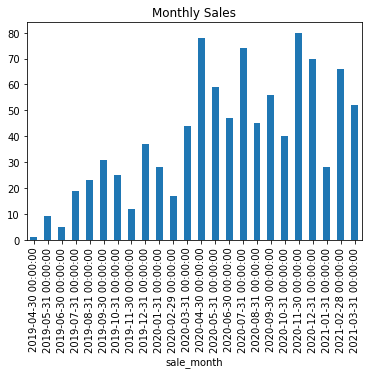

In [76]:
raw_data.groupby('sale_month')['order_id'].nunique().plot.bar(x='sale_month', y='order_id',title='Monthly Sales')

### Sales by destination country

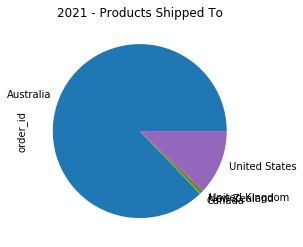

In [77]:
raw_data.groupby('delivery_country')['order_id'].nunique().plot.pie(x='delivery_country', y='order_id',title='2021 - Products Shipped To')

In [78]:
raw_data.groupby('delivery_country')['order_id'].nunique()

delivery_country
Australia         825
Canada              1
New Zealand         5
United Kingdom      2
United States     113
Name: order_id, dtype: int64

### Discount usage

In [79]:
raw_data.groupby('sale_month').agg({'discount_used': 'sum', 'order_id': 'nunique'}).tail(6)

,discount_used,order_id
sale_month,,
2020-10-31,4,40
2020-11-30,13,80
2020-12-31,8,70
2021-01-31,4,28
2021-02-28,6,66
2021-03-31,9,52


### Top Selling Items over time

In [40]:
item_count = raw_data.groupby(['item_group']).agg({'quantity': 'sum','price':'sum'})
item_sorted = item_count.groupby(['item_group']).agg({'quantity': 'sum', 'price':'sum'})
item_sorted.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
item_group,,
Hair Clip,316,2790.0
Wash Cloth,315,2802.0
Bib,290,3453.0
Doll Bedding,154,4062.0
Play Mat,136,11274.0
Non Grouped,120,5046.5
Clothing,74,2498.0
Doll Nappy,60,622.5
Basket,56,1617.0


### Top Selling items - Last three months

In [41]:
recent = raw_data[(raw_data['sale_month'] == '2021-03-31') | (raw_data['sale_month'] == '2021-02-28') | (raw_data['sale_month'] == '2021-01-31')]
recent_sort = recent.groupby(['item_group']).agg({'quantity': 'sum', 'price':'sum'})
recent_sort.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
item_group,,
Wash Cloth,62,502.0
Bib,47,601.0
Hair Clip,27,323.0
Doll Nappy,23,223.0
Non Grouped,21,693.0
Doll Bedding,19,510.0
Play Mat,19,1546.0
Basket,8,225.0
Burp Cloth,3,39.0


### Analysing return cutomers
1. Looking at the number of items purchased over multiple orders

In [80]:
multi_orders = raw_data.groupby(['delivery_name']).agg({'quantity': 'sum','order_id':'nunique', 'price':'sum'})
multi_orders.sort_values(by = 'order_id', ascending=False).head(10)

,quantity,order_id,price
delivery_name,,,
Haylee Turner,14,8,379.0
Kaitlyn Wise,10,7,228.0
Claire Boyce,10,7,204.0
Kirsty Finch,8,6,143.5
Chrystal Dow,6,5,317.5
Cassie Parnaby,9,5,259.0
Stephanie Curran,17,5,195.0
Rowena Fawole,5,4,139.0
Melissa Camilleri,8,3,67.0


### Item count
1. Investing highest selling items

In [81]:
item_count = raw_data.groupby(['item_name']).agg({'quantity': 'sum','order_id':'nunique', 'price':'sum'})
item_count.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,order_id,price
item_name,,,
Velvet Snap Hair Clip | Single clip or a Set of two - Olive & Miles - Free Postage,110,70,741.0
"Wash Cloth organic bamboo cotton, floral baby wash bath cloth, face washer, reusable face wipes, baby girl gift, Olive & Miles - FREE POST",90,51,914.0
"Baby girl pink floral bib, reversible vintage style bib, smash cake bib, boho fringe girl bib, first birthday bib, olive & miles FREE POST",89,84,1028.0
"Wash Cloth organic bamboo cotton, baby wash bath cloth, double gauze face washer, reusable face wipes, baby gift, Olive & Miles - FREE POST",87,39,740.0
Corduroy Fabric Hair Clip | One clip or a set of two - Olive & Miles - Free Postage,68,41,372.0
"Wash Cloth organic bamboo cotton, baby wash bath cloth, mcn cloth nappy, face washer, reusable face wipes, baby gift, Olive & Miles",52,27,488.0
"Washer organic bamboo cotton, native floral baby wash bath cloth, eucalyptus face washer, reusable face wipes, baby gift, Olive & Miles",44,22,409.0
Pastel Snap Hair Clip | Gingham pink blue mustard - Set of two - Olive & Miles - Free Postage,40,28,320.0
"Reversible linen vintage style bib, baby girl linen gingham, smash cake bib, boho fringe bib, first birthday bib, olive & miles FREE POST",37,36,442.0


### Wash cloth analysis
1. Investing top selling variations

In [44]:
wash_cloth_all = raw_data[raw_data['item_group']=='Wash Cloth']
wash_cloth_group = wash_cloth_all.groupby(['variations']).agg({'quantity': 'sum', 'price':'sum'})
wash_cloth_group.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
variations,,
Colour:Protea floral,20,197.0
Colour:Peony,18,161.0
Colour:Mixed Eucalyptus,18,142.0
Colour:Autumn Floral,18,152.0
Colour:Eucalyptus,16,174.0
Colour:Watercolour floral,16,174.0
Colour:Dark Pink,13,120.0
Colour:Baby Pink,12,100.0
Colour:Purple mini floral,12,129.0


### Top selling play mats

In [45]:
play_mats = raw_data[raw_data['item_group']=='Play Mat']
play_mats_grp = play_mats.groupby(['item_name']).agg({'quantity': 'sum', 'price':'sum'})
play_mats_grp.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
item_name,,
"Velvet Dusty Pink play mat / rug, baby girl playmat, tummy time, quilted padded mat, pink rug, play nursery rug, Olive & Miles - FREE POST",25,2064.0
"Velvet playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, quilted padded baby mat, dusty green play nursery rug, Olive & Miles",16,1290.0
"Wildflower playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, Australian padded baby mat, floral play nursery rug, Olive & Miles",12,1213.0
"Velvet playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, quilted padded baby mat, dusty sage play nursery rug, Olive & Miles",9,692.0
"Doll play mat, doll accessories, pretend play, sibling gift, miniland born dolly round play mat, baby girl nursery - Olive & Miles",9,286.0
"Eucalyptus playmat/rug - FREE POSTAGE, baby play mat, newborn tummy time, Australian padded baby mat, unisex play nursery rug, Olive & Miles",8,811.0
"Velvet round Bean bag/ floor mat/ playmat/ rug/ floor cushion, play mat pink, baby girl nursery, pink bean bag rug cushion - Olive & Miles",6,509.0
"Velvet cream play mat / rug, baby girl boy playmat, tummy time, quilted padded mat, boho rug, unisex nursery rug, Olive & Miles - FREE POST",5,340.0
"Velvet cream play mat / rug, baby girl boy playmat, tummy time, quilted bay mat, boho rug, unisex nursery rug, Olive & Miles - FREE POST",4,275.0


### Basket Variation Sales
1. Looking at top selling variations of basket sales

In [46]:
baskets = raw_data[raw_data['item_group']=='Basket']
baskets_grp = baskets.groupby(['variations']).agg({'quantity': 'sum', 'price':'sum'})
baskets_grp.sort_values(by = 'quantity', ascending=False).head(10)

,quantity,price
variations,,
basket:Medium,20,580.0
basket:Small,13,325.0
basket:Large,12,384.0
basket:Petite,2,36.0
"Colours:Baby Pink,Personalisation:Baby pink and blue please",1,25.0
"Colours:Grey,Personalisation:Two grey please.",1,25.0
"Colours:Hot Pink,Personalisation:Hot pink and white please",1,25.0
"First Basket:Blue,Second Basket:Baby Pink",1,25.0


### Data Statistics
1. The average order price is 23.48
2. When removing the order prices above 50 the average comes down to 16.17
3. When only including orders above 50 the average increases to 89.27

In [ ]:
raw_data.price.mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc61d73850>]],
      dtype=object)

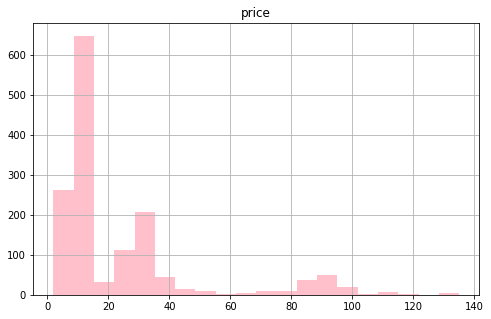

In [58]:
raw_data.hist(column = 'price', bins=20, figsize=(8,5), color='pink')

In [53]:
mean_low = raw_data[raw_data['price'] <= 50]
mean_low.price.mean()

16.186466165413535

In [49]:
mean_high = raw_data[raw_data['price'] >= 50]
mean_high.price.mean()

89.27027027027027

In [84]:
raw_data.describe()

,price,discount_amount,delivery_discount,order_sales_tax,discount_used
count,1477.000000,1477.000000,1477.0,1477.000000,1477.000000
mean,23.486798,0.867691,0.0,0.053643,0.096141
std,24.287963,3.699515,0.0,0.706277,0.294884
min,2.000000,0.000000,0.0,0.000000,0.000000
25%,10.000000,0.000000,0.0,0.000000,0.000000
50%,13.000000,0.000000,0.0,0.000000,0.000000
75%,29.000000,0.000000,0.0,0.000000,0.000000
max,135.000000,57.200000,0.0,16.800000,1.000000


## File output

In [225]:
null_items = raw_data[raw_data['item_group']=='']

In [265]:
null_items.to_csv('..//Output//non_grouped_items.csv',index=False)

In [10]:
raw_data.to_csv('..//Output//full_dataset.csv', index=False)